# Ensemble #
----------------------------------------------------------------------------------------------------------------------

## 1. Introduction ##
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. This has been the case in a number of machine learning competitions, where the winning solutions used ensemble methods. In the popular Netflix Competition, the winner used an ensemble method to implement a powerful collaborative filtering algorithm. Ensemble methods work best when the predictors are as independ‐ ent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy.


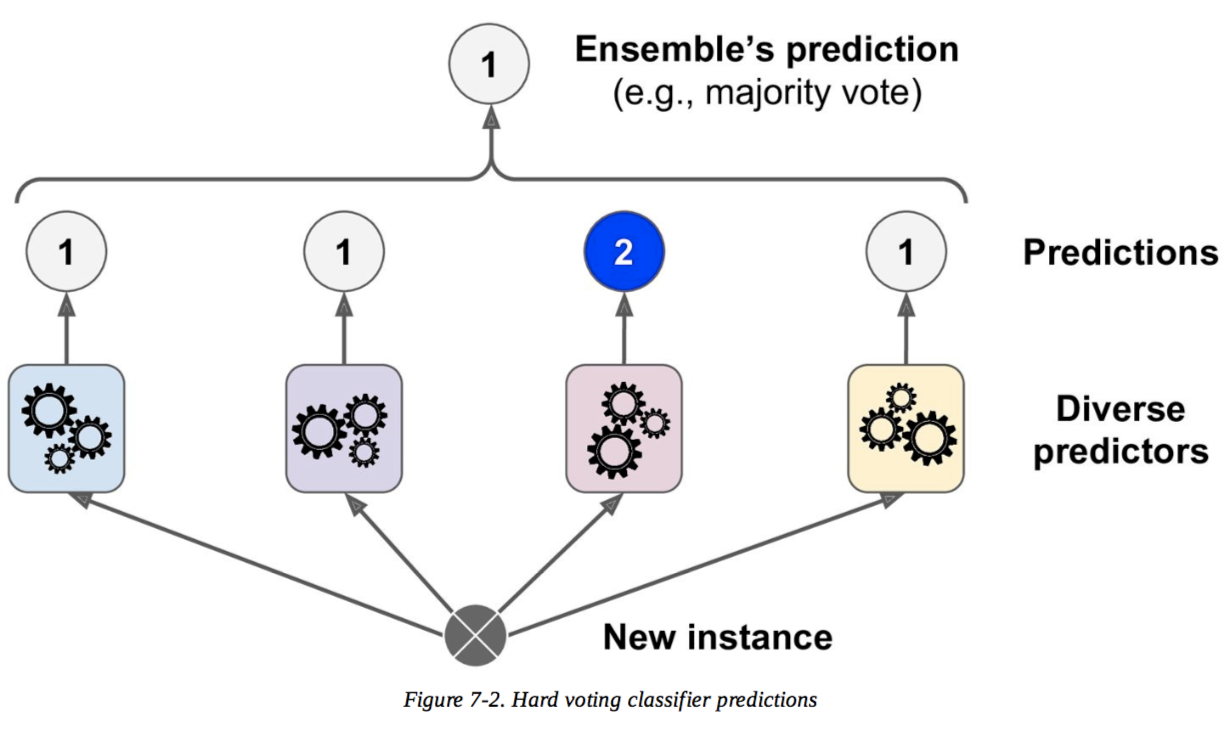

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
data = pd.read_csv('diabetes.csv') 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

## Data Analysis ##
First check with the distribution of data by using histogram  

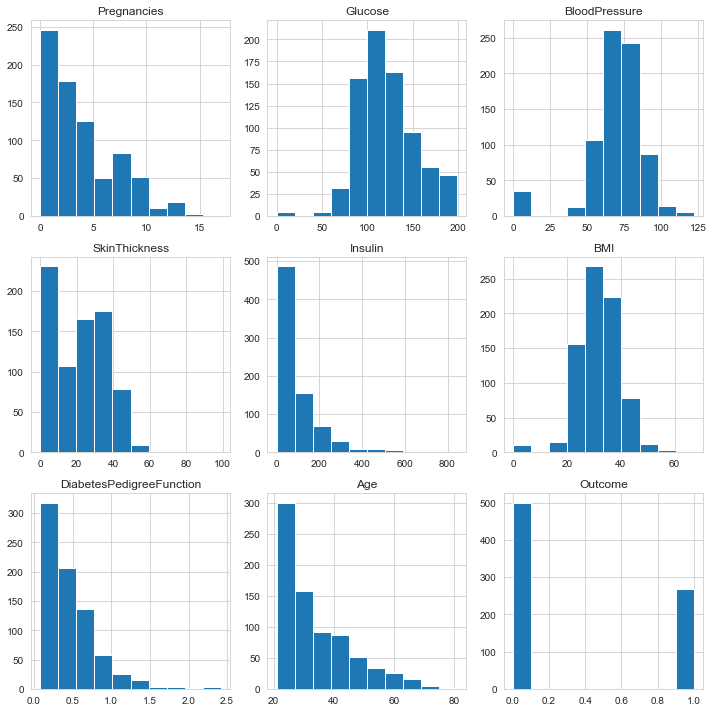

In [52]:

data.hist(figsize = (10,10))
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

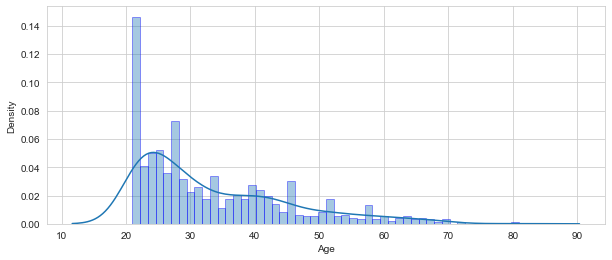

In [53]:
plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.distplot(data['Age'], bins = 50, kde=True, hist_kws=dict(edgecolor="blue", linewidth=1))

Find the missing value in each column

In [54]:
data.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [55]:
# Get number of missing values in each column
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
data.duplicated().sum()

0

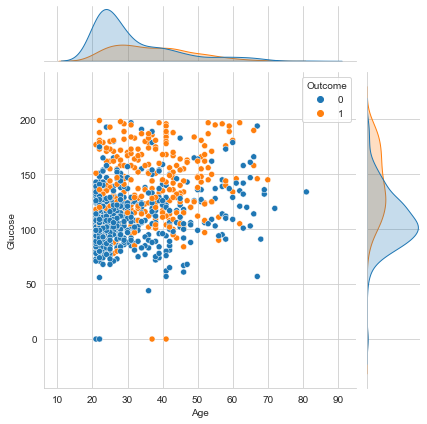

In [57]:
sns.jointplot(x = "Age", y= "Glucose",hue='Outcome', data = data) 

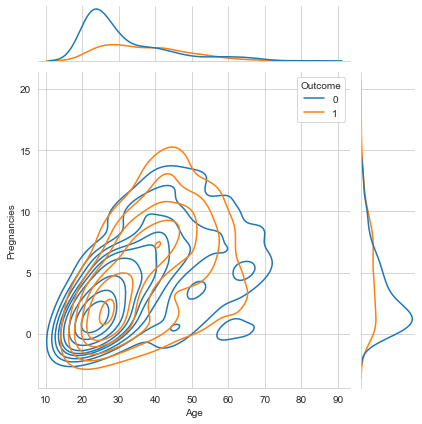

In [58]:
sns.jointplot(x='Age', y='Pregnancies', data= data, hue='Outcome',kind='kde')

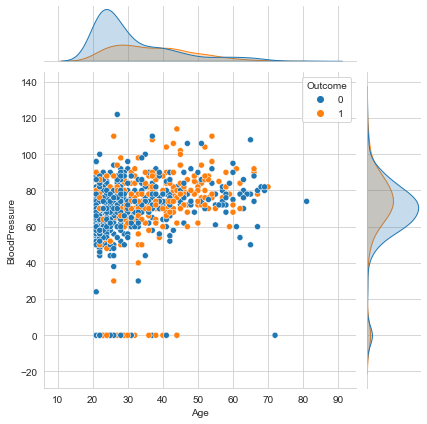

In [59]:
sns.jointplot(x='Age',y='BloodPressure',data=data,hue='Outcome')

<Figure size 720x720 with 0 Axes>

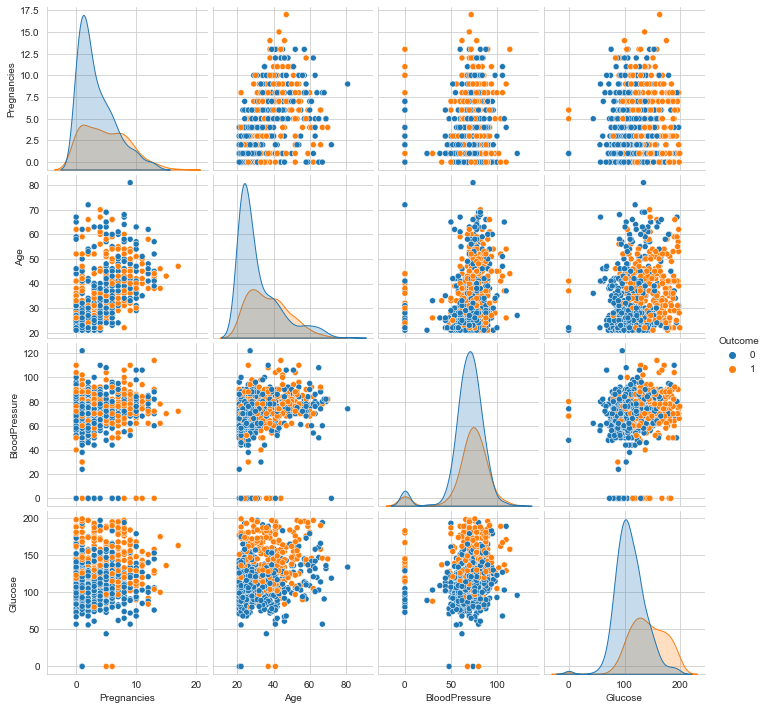

In [60]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    data,
    hue ='Outcome',
    vars=['Pregnancies', 'Age', 'BloodPressure', 'Glucose'],
    diag_kind='kde',
    
)
plt.show()

<AxesSubplot:>

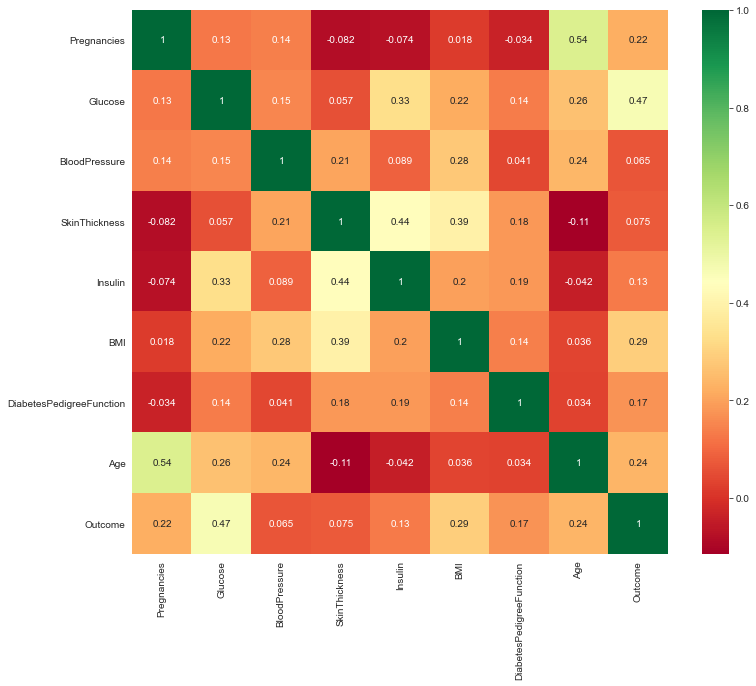

In [61]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn') 

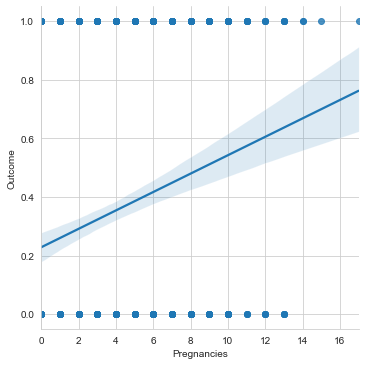

In [62]:
sns.lmplot(x="Pregnancies", y="Outcome", data=data)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
X = data[['Pregnancies', 'Age', 'BloodPressure',
       'Glucose']]
y = data['Outcome']

In [65]:
X

,Pregnancies,Age,BloodPressure,Glucose
0,6,50,72,148
1,1,31,66,85
2,8,32,64,183
3,1,21,66,89
4,0,33,40,137
...,...,...,...,...
763,10,63,76,101
764,2,27,70,122
765,5,30,72,121
766,1,47,60,126


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

## Randome Forest ##

In [67]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train,rf.predict(X_train)))

Train - Accuracy : 1.0


In [69]:
y_pred_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for Random Forest')

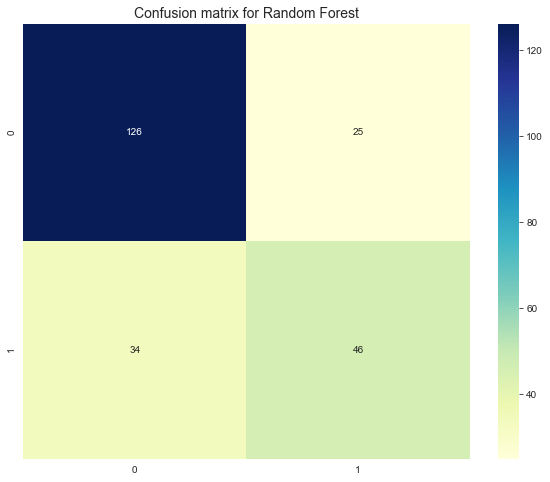

In [70]:
fig = plt.figure(figsize = (10,8))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix for Random Forest',fontsize=14)

In [78]:
cr_rf = classification_report(y_test, y_pred_rf,target_names=['No Outcome','Outcome'])
print(cr_rf)

              precision    recall  f1-score   support

  No Outcome       0.79      0.83      0.81       151
     Outcome       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



## Decision Tree ##


In [72]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train,dt.predict(X_train)))

Train - Accuracy : 1.0


Text(0.5, 1.0, 'Confusion matrix for Decision Tree')

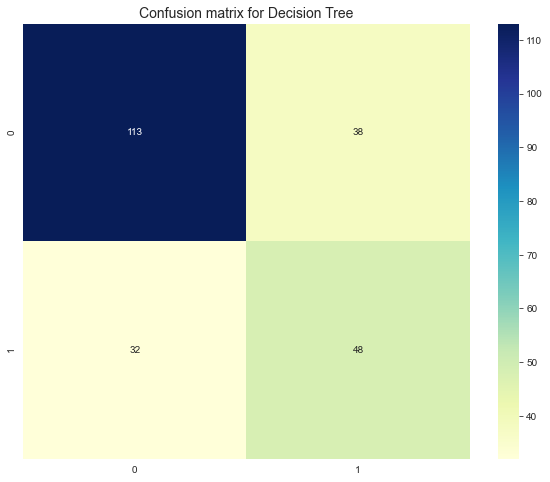

In [74]:
y_pred_dt = dt.predict(X_test)
fig = plt.figure(figsize = (10,8))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt,annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix for Decision Tree',fontsize=14)

In [75]:
cr_dt = classification_report(y_test, y_pred_dt,target_names=['No Outcome','Outcome'])
print(cr_dt)

              precision    recall  f1-score   support

 Not Clicked       0.78      0.75      0.76       151
     Clicked       0.56      0.60      0.58        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



## Multivariable Logistic Regression ##

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
X = data[['Pregnancies', 'Age', 'BloodPressure',
       'Glucose']]
y = data['Outcome']

In [80]:
X

,Pregnancies,Age,BloodPressure,Glucose
0,6,50,72,148
1,1,31,66,85
2,8,32,64,183
3,1,21,66,89
4,0,33,40,137
...,...,...,...,...
763,10,63,76,101
764,2,27,70,122
765,5,30,72,121
766,1,47,60,126


In [81]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Train-Test Split Data ##


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [83]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train,logistic.predict(X_train)))


Train - Accuracy : 0.74487895716946


## Test & Evaluations ##

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

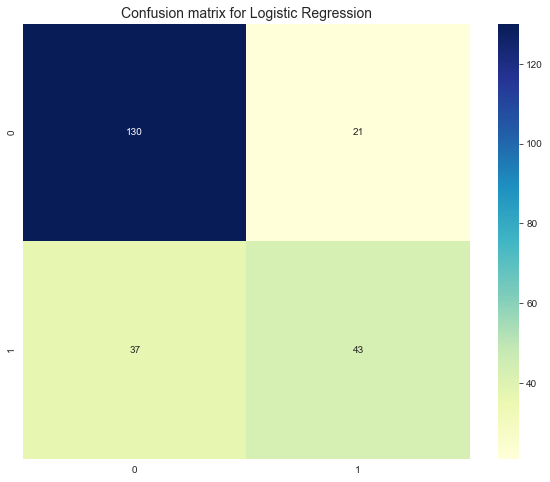

In [84]:
y_pred = logistic.predict(X_test)
fig = plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu")
plt.title('Confusion matrix for Logistic Regression',fontsize=14)

## Classification Report ##

In [90]:
cr = classification_report(y_test, y_pred,target_names=['Not Clicked','Clicked'])
print(cr)

              precision    recall  f1-score   support

 Not Clicked       0.78      0.86      0.82       151
     Clicked       0.67      0.54      0.60        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



## ROC Curve ##

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR).

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:



True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows: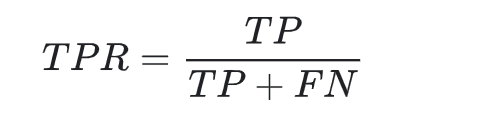

False Positive Rate (FPR) is defined as follows:
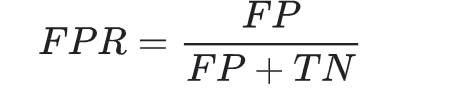

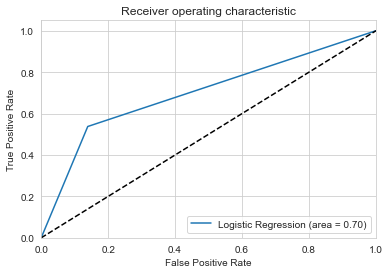

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Ensemble##

Now, we do ensemble learning here.

In [ ]:
voting_clf = VotingClassifier([('lr', logistic),
                              ('rf', rf),
                              ('dt', dt)], voting = 'hard')

In [ ]:
from sklearn.metrics import accuracy_score
for clf in [logistic, rf, dt, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict (X_test)
    print (f' {clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred_clf)}')

In [ ]:
fig = plt.figure(figsize = (10,8))
cm_clf = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_clf,annot=True,fmt='g',cmap="YlGnBu")

plt.title('Confusion matrix for VotingClassifier',fontsize=14)

In [ ]:
cr_clf = classification_report(y_test, y_pred_clf,target_names=['Not Clicked','Clicked'])
print(cr_clf

## Conclusion ##
The LogisticRegression, accuracy score = 0.74

The Decision Tree ,accuracy score = 0.7

The Random Forest ,accuracy score = 0.74

The Ensemble VotingClassifier, accuracy score = 0.73

The Randome forest and logisticregression has the highest accuarcy score whhich is 0.74.

When we use ensemble method, the accuracy score is 0.73